# dN/dS ratio in SARS-CoV-2

The dN/dS ratio can be used to estimate the selective pressure.
Here we aim at exploring the evolution of the dN/dS ratio through time across different countries and genes.

For that purpose we will explore the results from ENA (queried on 07/07/2021, n=44,371) and from GISAID (queried on 07/07/2021, n=1,799,367).

We are interested in understanding how the introduction of vaccines was reflected in SARS-CoV-2 evolution. 
For this purpose we are loading the dataset from Our World In Data (Mathieu, 2021) queried on the 17/09/2021 from https://covid.ourworldindata.org/data/owid-covid-data.csv.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_context("talk")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [2]:
gisaid_download_date = "07/07/2021"
gisaid_num_samples = "1,799,367"
ena_download_date = "29/07/2021"
ena_num_samples = "51,461"

In [3]:
data = pd.read_csv('precomputed_dn_ds_v2.csv')
data.head()

id       month region_type region_name country source  ns  s     dn_ds
0  1728  2019-12-01        GENE           E   China    ENA   0  1       NaN
1  1729  2019-12-01        GENE           N   China    ENA   4  1  1.192075
2  1730  2019-12-01        GENE      ORF1ab   China    ENA  18  2  2.483929
3  1731  2019-12-01        GENE           S   China    ENA   2  3  0.189147
4  1732  2020-01-01        GENE           E   China    ENA   0  1       NaN

According to Lythgoe, 2021 these are the ratios of possible synonymous to non-synonymous variants for each gene in SARS-CoV-2.
    

  name  | ratio_synonymous_non_synonymous 
--------|---------------------------------
 S      |               0.283720930232558
 ORF3a  |                         0.28625
 ORF1ab |                       0.2759921
 ORF7b  |                                
 ORF1ab |                       0.2759921
 M      |                           0.306
 ORF10  |               0.266666666666667
 ORF6   |                          0.2425
 ORF8   |               0.268421052631579
 ORF7a  |               0.294411764705882
 N      |               0.298018867924528
 E      |                          0.3375


The ratio across the coding region is 0.281813677

In [4]:
ratios_df = pd.DataFrame(data=[
    ["S", 0.283720930232558],
    ["ORF3a", 0.28625],
    ["ORF1ab", 0.2759921],
    ["ORF7b", None],
    ["M", 0.306],
    ["ORF10", 0.266666666666667],
    ["ORF6", 0.2425],
    ["ORF8", 0.268421052631579],
    ["ORF7a", 0.294411764705882],
    ["N", 0.298018867924528],
    ["E", 0.3375]
], columns=["name", "ratio"])
ratios_df.head()

name     ratio
0       S  0.283721
1   ORF3a  0.286250
2  ORF1ab  0.275992
3   ORF7b       NaN
4       M  0.306000

In [5]:
ratios = {
    "S": 0.283720930232558,
    "ORF3a": 0.28625,
    "ORF1ab": 0.2759921,
    "ORF7b": None,
    "M": 0.306,
    "ORF10": 0.266666666666667,
    "ORF6": 0.2425,
    "ORF8": 0.268421052631579,
    "ORF7a": 0.294411764705882,
    "N": 0.298018867924528,
    "E": 0.3375
    }

In [6]:
ratio_coding_region = 0.281813677
ratio_spike_protein = 0.283720930232558

In [7]:
genes = list(ratios_df[~ratios_df.ratio.isna()].name)
genes

['S', 'ORF3a', 'ORF1ab', 'M', 'ORF10', 'ORF6', 'ORF8', 'ORF7a', 'N', 'E']

In [8]:
#data = pd.merge(left=data, right=ratios, left_on="region_name", right_on="name")

In [43]:
vaccination_data = pd.read_csv("owid-covid-data.csv")
vaccination_data.date = pd.to_datetime(vaccination_data.date)
vaccination_data.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0              NaN                597.029                 9.59   
1              NaN                597.029                 9.59   
2              NaN                597.029                 9.59   
3              NaN                597.029                 9.59   
4              NaN                597.029                 9.59   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 62 columns]

In [30]:
list(vaccination_data.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [35]:
vaccination_data[vaccination_data.location == "United Kingdom"][["location", "date", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred"]]

location        date  people_vaccinated_per_hundred  \
110508  United Kingdom  2020-01-31                            NaN   
110509  United Kingdom  2020-02-01                            NaN   
110510  United Kingdom  2020-02-02                            NaN   
110511  United Kingdom  2020-02-03                            NaN   
110512  United Kingdom  2020-02-04                            NaN   
...                ...         ...                            ...   
111098  United Kingdom  2021-09-12                          71.02   
111099  United Kingdom  2021-09-13                          71.05   
111100  United Kingdom  2021-09-14                          71.08   
111101  United Kingdom  2021-09-15                          71.11   
111102  United Kingdom  2021-09-16                            NaN   

        people_fully_vaccinated_per_hundred  
110508                                  NaN  
110509                                  NaN  
110510                                  NaN  
110511                                  NaN  
110512                                  NaN  
...                                     ...  
111098                                64.58  
111099                                64.67  
111100                                64.76  
111101                                64.85  
111102                                  NaN  

[595 rows x 4 columns]

## Vaciness approvals

In [9]:
approvals = pd.DataFrame(
    [
        [datetime(2020, 12, 11), "FDA approves BNT"],
        [datetime(2020, 12, 18), "FDA approves Moderna"],
        [datetime(2021, 2, 27), "FDA approves J&J"],
        [datetime(2020, 12, 30), "UK approves AZ"],
        [datetime(2020, 12, 21), "EU approves BNT"],
        [datetime(2021, 1, 6), "EU approves Moderna"],
        [datetime(2021, 1, 29), "EU approves AZ"],
    ], 
    columns= ["date", "event"])
approvals.head()

date                 event
0 2020-12-11      FDA approves BNT
1 2020-12-18  FDA approves Moderna
2 2021-02-27      FDA approves J&J
3 2020-12-30        UK approves AZ
4 2020-12-21       EU approves BNT

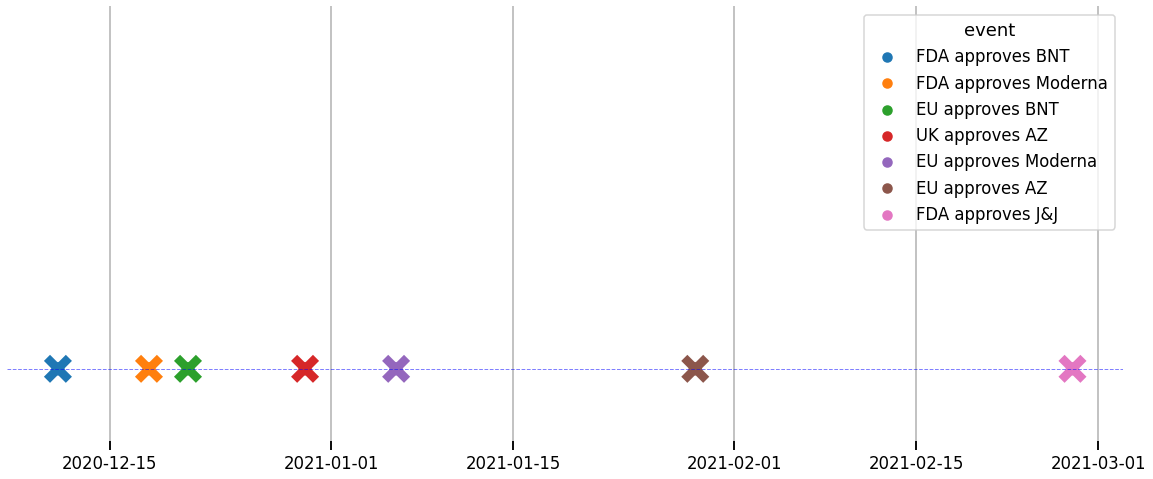

In [10]:
plt.figure(figsize=(20, 8))
#sns.lineplot(data=approvals, x="date")
g = sns.scatterplot(data=approvals.sort_values("date"), x="date", y=0, hue="event", marker='X', s=1000)  ##markers={'marker':'X', 'size':10})
plt.axhline(y=0, color='b', linestyle='--', alpha=0.5, linewidth=1)
sns.despine(bottom=True, left=True)
g.set(yticklabels=[])  
g.set(ylabel=None)
g.set(xlabel=None)
g.tick_params(left=False)
plt.ylim([-0.1, 0.5])
plt.grid(axis="x")
plt.savefig("dn_ds_figures/vaccine_approvals.jpg")

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
117231   2021-09-12
117232   2021-09-13
117233   2021-09-14
117234   2021-09-15
117235   2021-09-16
Name: date, Length: 117236, dtype: datetime64[ns]

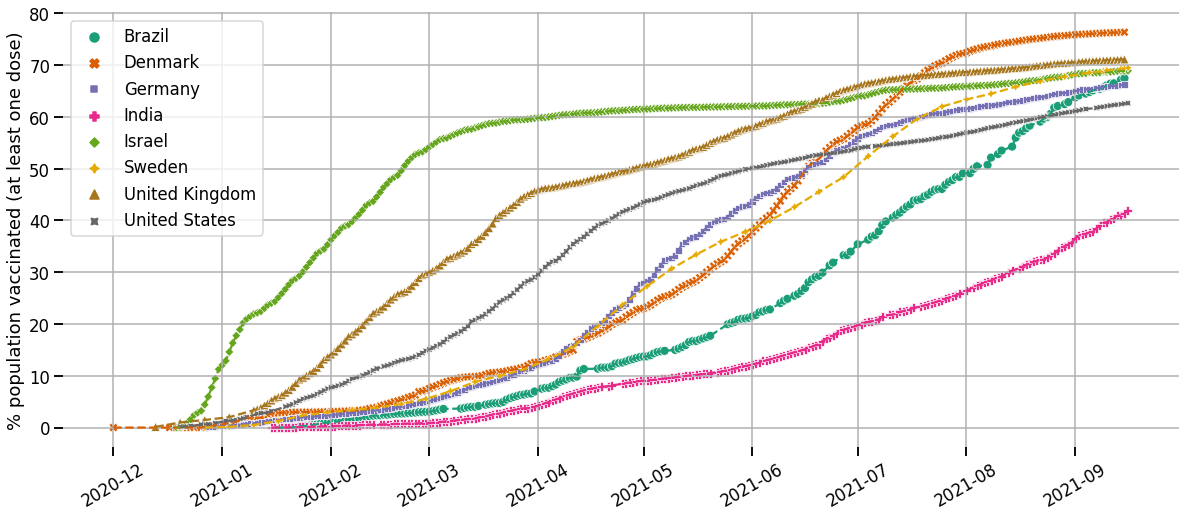

In [87]:
countries_of_interest =  ["United Kingdom", "United States", "Germany", "Denmark", "Sweden", "Israel", "India", "Brazil"]
data_to_plot = vaccination_data[vaccination_data.location.isin(countries_of_interest)][["location", "date", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred"]]

plt.figure(figsize=(20, 8))
sns.lineplot(data=data_to_plot, x="date", y="people_vaccinated_per_hundred", hue="location", legend=False, linestyle="--", palette='Dark2')
sns.scatterplot(data=data_to_plot, x="date", y="people_vaccinated_per_hundred", hue="location", style="location", legend=True, palette='Dark2')
plt.xticks(rotation=30)
plt.title("")
plt.ylabel("% population vaccinated (at least one dose)")
plt.xlabel(None)
plt.legend(title=None)
plt.grid(axis="x")
plt.grid(axis="y")
sns.despine(bottom=True, left=True)
plt.savefig("dn_ds_figures/people_vaccinated_per_hundred.png")

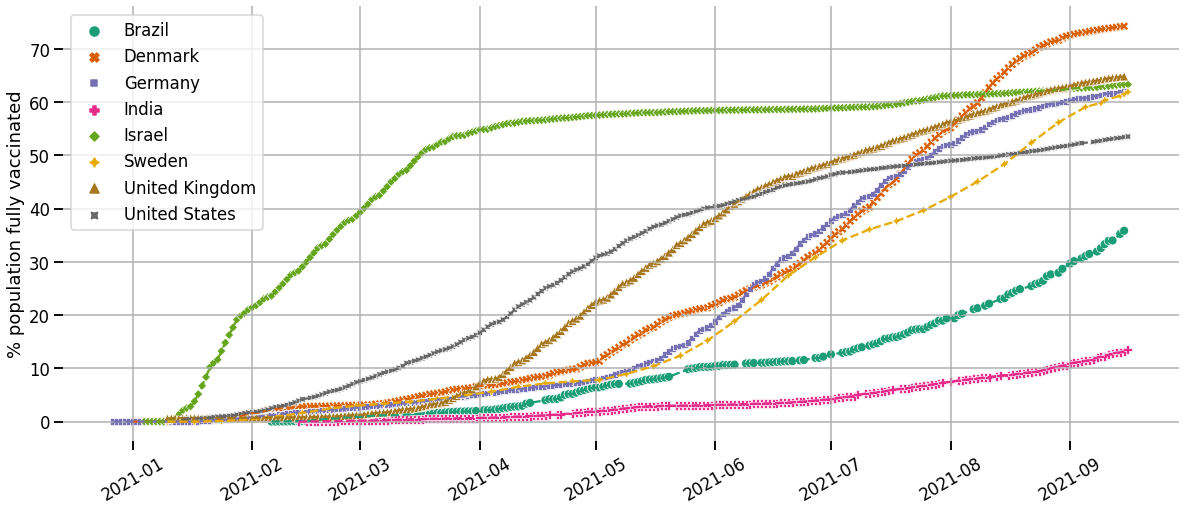

In [88]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=data_to_plot, x="date", y="people_fully_vaccinated_per_hundred", hue="location", legend=False, linestyle="--", palette='Dark2')
sns.scatterplot(data=data_to_plot, x="date", y="people_fully_vaccinated_per_hundred", hue="location", style="location", legend=True, palette='Dark2')
plt.xticks(rotation=30)
plt.title("")
plt.ylabel("% population fully vaccinated")
plt.xlabel(None)
plt.legend(title=None)
plt.grid(axis="x")
plt.grid(axis="y")
sns.despine(bottom=True, left=True)
plt.savefig("dn_ds_figures/people_fully_vaccinated_per_hundred.png")

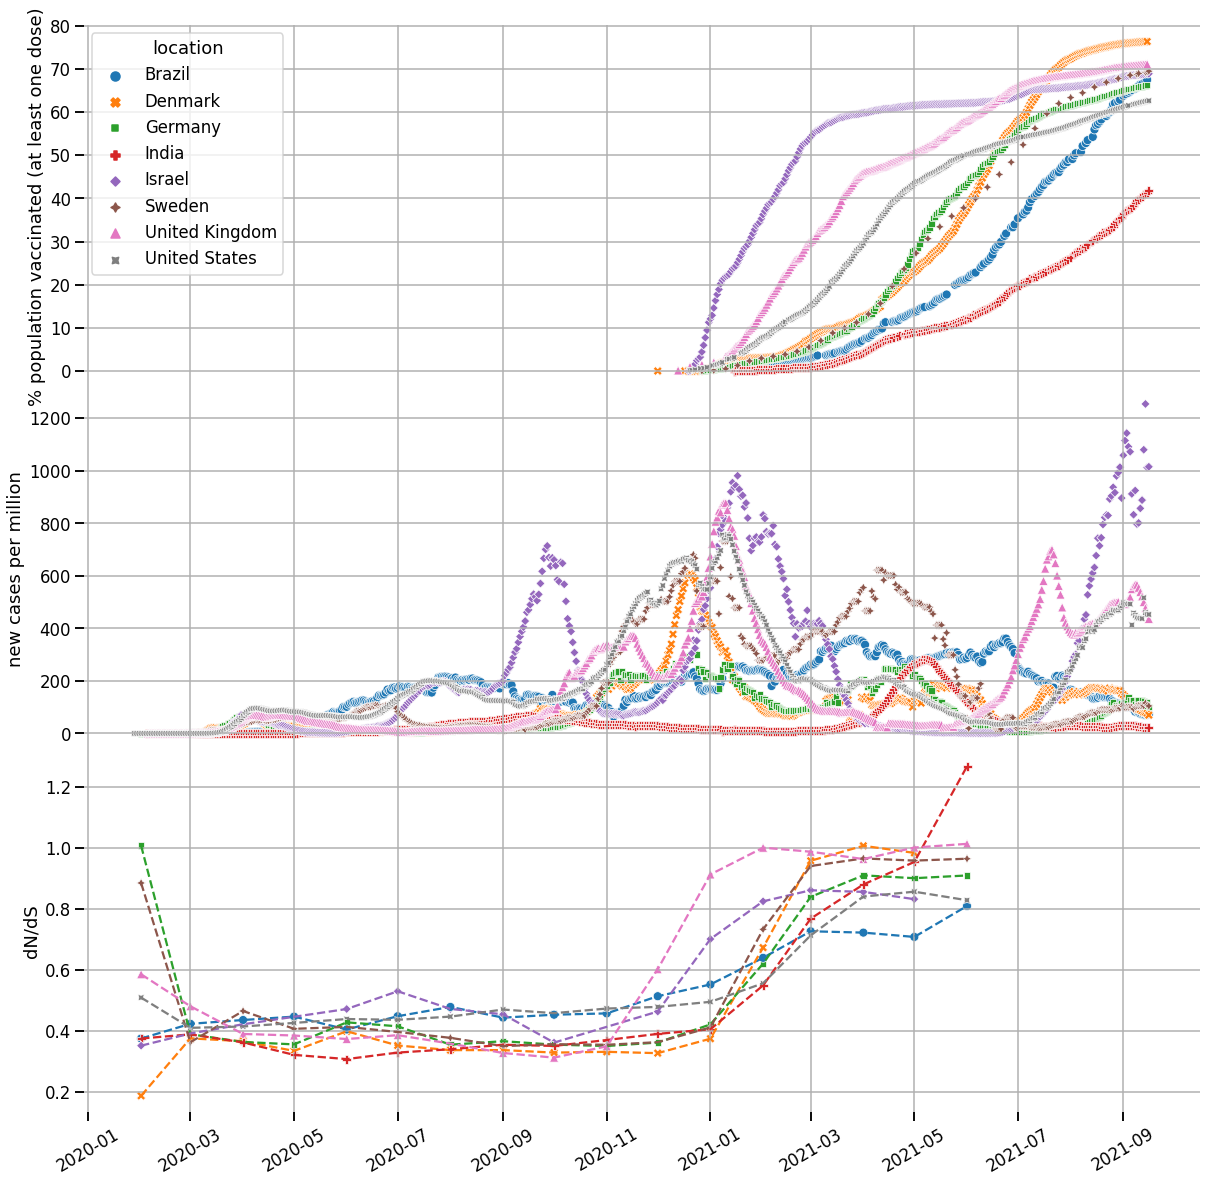

In [99]:
vaccination_data_to_plot = vaccination_data[vaccination_data.location.isin(countries_of_interest)][[
    "location", "date", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred", "new_cases_smoothed_per_million"]]
# & (data.region_name == "S")
dn_ds_data_to_plot = data[(data.source == "GISAID") & (data.country.isin(countries_of_interest)) & (data.month >= "2020-02-01")]
dn_ds_data_to_plot = dn_ds_data_to_plot.groupby(["month", "country"]).sum().reset_index().sort_values("month")
dn_ds_data_to_plot["dn_ds"] = ratio_coding_region / (dn_ds_data_to_plot.s / dn_ds_data_to_plot.ns)
dn_ds_data_to_plot.month = pd.to_datetime(dn_ds_data_to_plot.month)

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(20, 20), gridspec_kw={'height_ratios': [3, 3, 3]})
#sns.lineplot(data=vaccination_data_to_plot, x="date", y="people_vaccinated_per_hundred", hue="location", legend=False, linestyle="--", ax=ax1)
sns.scatterplot(data=vaccination_data_to_plot, x="date", y="people_vaccinated_per_hundred", hue="location", style="location", legend=True, ax=ax1)

#sns.lineplot(data=vaccination_data_to_plot, x="date", y="new_cases_smoothed_per_million", hue="location", legend=False, linestyle="--", ax=ax2)
sns.scatterplot(data=vaccination_data_to_plot, x="date", y="new_cases_smoothed_per_million", hue="location", style="location", legend=False, ax=ax2)

sns.lineplot(data=dn_ds_data_to_plot, x="month", y="dn_ds", hue="country", linestyle="--", legend=False, ax=ax3)
sns.scatterplot(data=dn_ds_data_to_plot, x="month", y="dn_ds", hue="country", style="country", legend=False, ax=ax3)

sns.despine(bottom=True, left=True)
ax1.grid(axis="x")
ax1.grid(axis="y")
ax2.grid(axis="x")
ax2.grid(axis="y")
ax3.grid(axis="x")
ax3.grid(axis="y")
ax1.set_ylabel("% population vaccinated (at least one dose)")
ax2.set_ylabel("new cases per million")
ax3.set_ylabel("dN/dS")
ax3.set_xlabel(None)
plt.xticks(rotation=30)
plt.subplots_adjust(hspace=0.0)
plt.savefig("dn_ds_figures/dnds_versus_people_fully_vaccinated_per_hundred.png")

## dN/dS overall

In [11]:
def plot_dn_ds_overall(data, title, filename):
    
    data_to_plot = data.groupby(["month", "source"]).sum().reset_index().sort_values("month")
    data_to_plot["dn_ds"] = ratio_coding_region / (data_to_plot.s / data_to_plot.ns)
    
    plt.figure(figsize=(20, 8))
    sns.lineplot(data=data_to_plot, x="month", y="dn_ds", hue="source", linestyle="--", legend=True)
    sns.scatterplot(data=data_to_plot, x="month", y="dn_ds", hue="source", size="ns", legend=False)
    plt.xticks(rotation=30)
    plt.title(title)
    plt.ylabel("dN/dS")
    plt.xlabel(None)
    plt.legend(title=None)
    sns.despine()
    plt.savefig(filename)

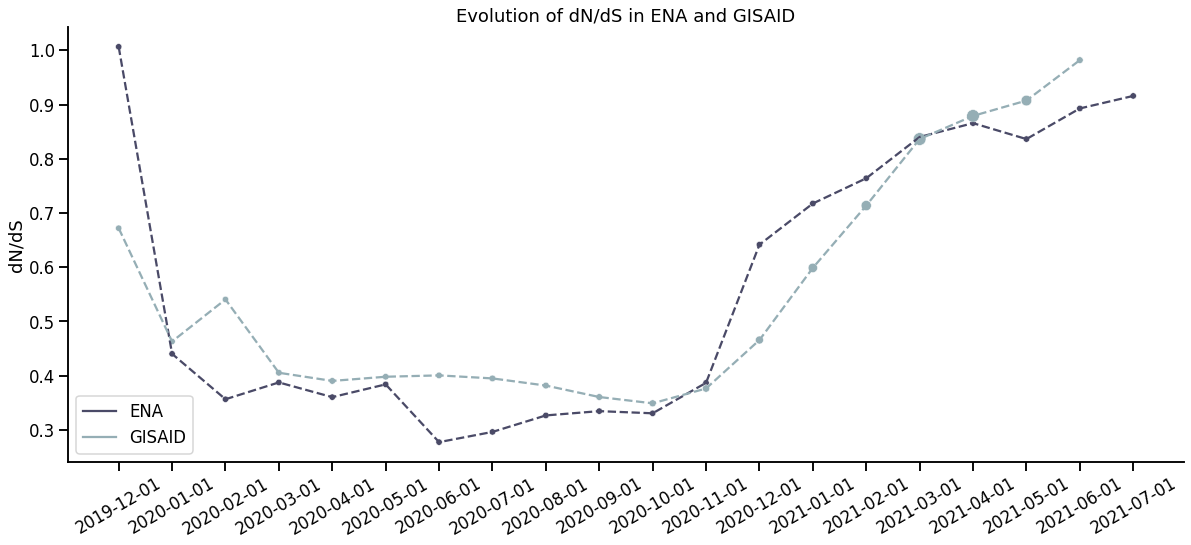

In [12]:
plot_dn_ds_overall(
        data=data, 
        title="Evolution of dN/dS in ENA and GISAID".format(
            gene=g, date=ena_download_date, num_samples=ena_num_samples), 
        filename="dn_ds_figures/dn_ds_ena_vs_gisaid.png"
    )

## dN/dS by gene and country

Plot the evolution month by month of the dN/dS on each of the SARS-CoV-2 genes by country.

In [13]:
def plot_dn_ds_by_country(data, title, filename, ratio, legend=True):
    
    data_to_plot = data.groupby(["month", "country"]).sum().reset_index().sort_values("month")
    data_to_plot["dn_ds"] = ratio / (data_to_plot.s / data_to_plot.ns)
    
    plt.figure(figsize=(20, 8))
    sns.lineplot(data=data_to_plot, x="month", y="dn_ds", hue="country", legend=legend, linestyle="--", palette='Dark2')
    sns.scatterplot(data=data_to_plot, x="month", y="dn_ds", hue="country", size="ns", legend=False, palette='Dark2')
    plt.xticks(rotation=30)
    plt.title(title)
    plt.ylabel("dN/dS")
    plt.xlabel(None)
    if legend:
        plt.legend(title=None)
    sns.despine()
    plt.savefig(filename)

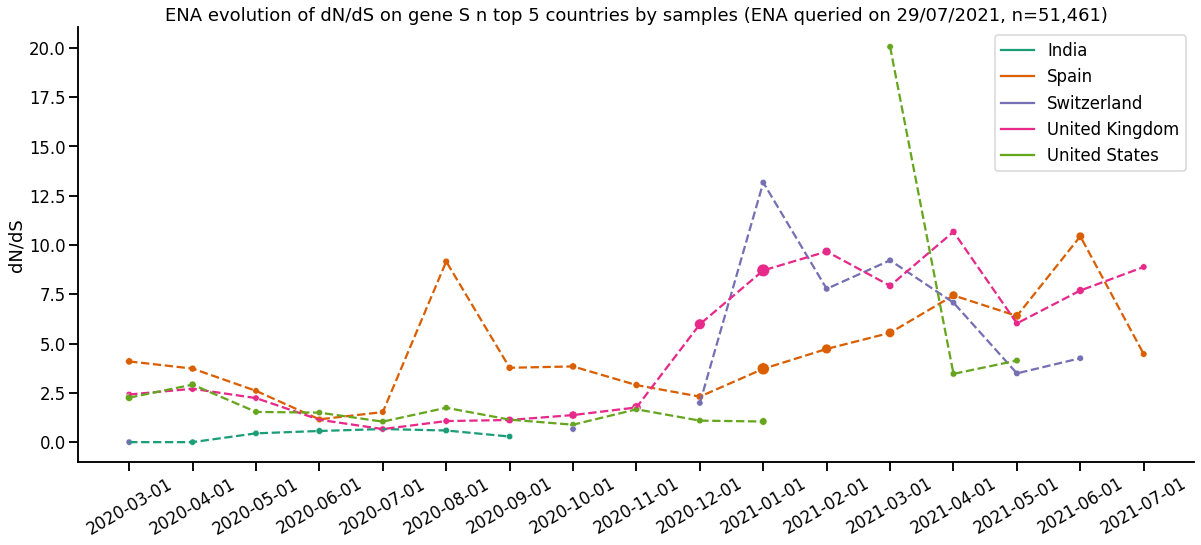

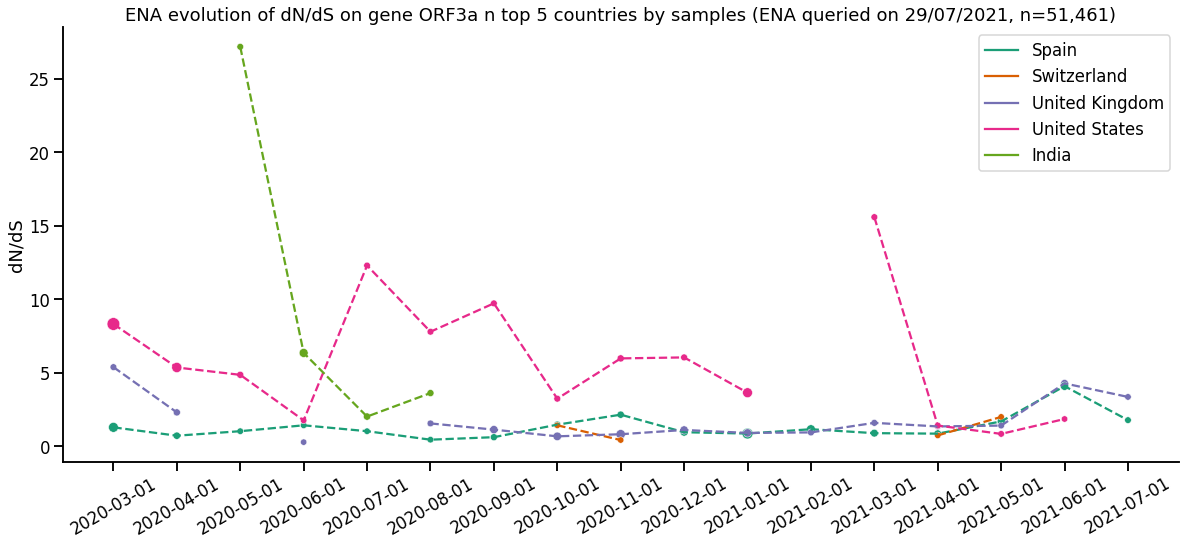

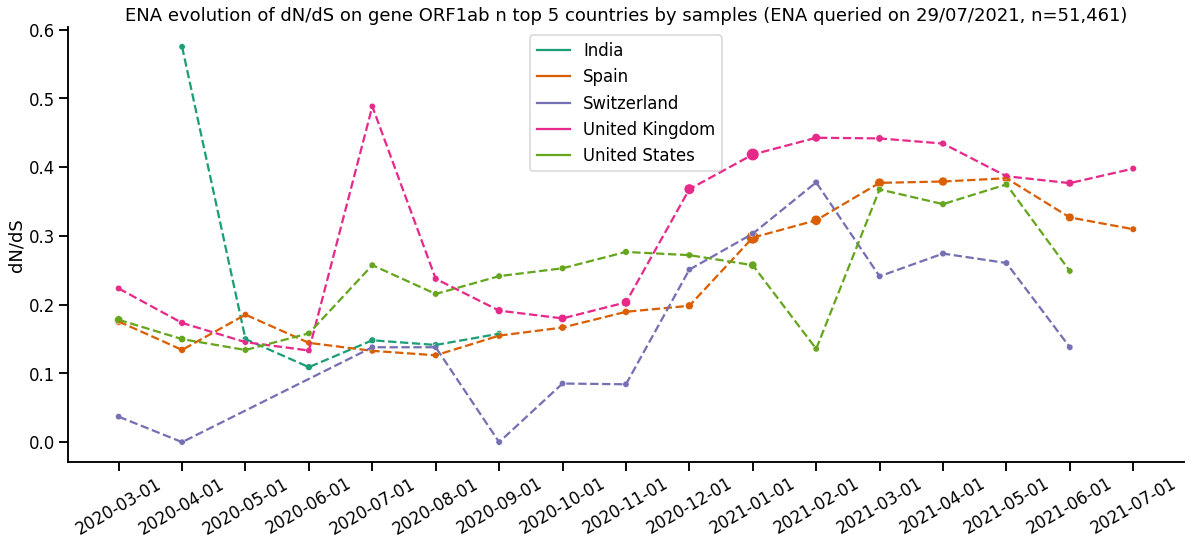

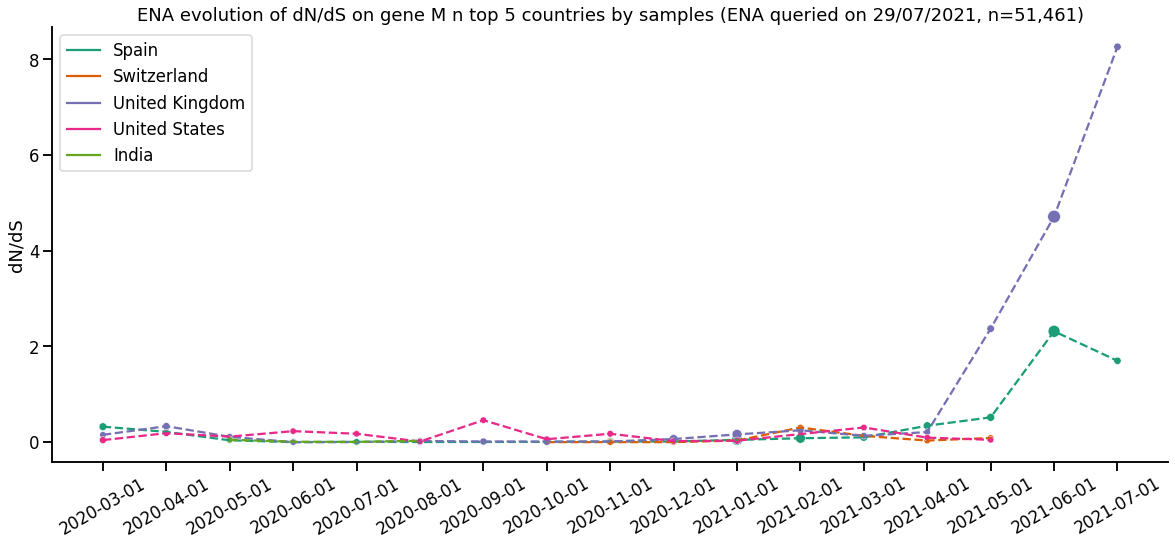

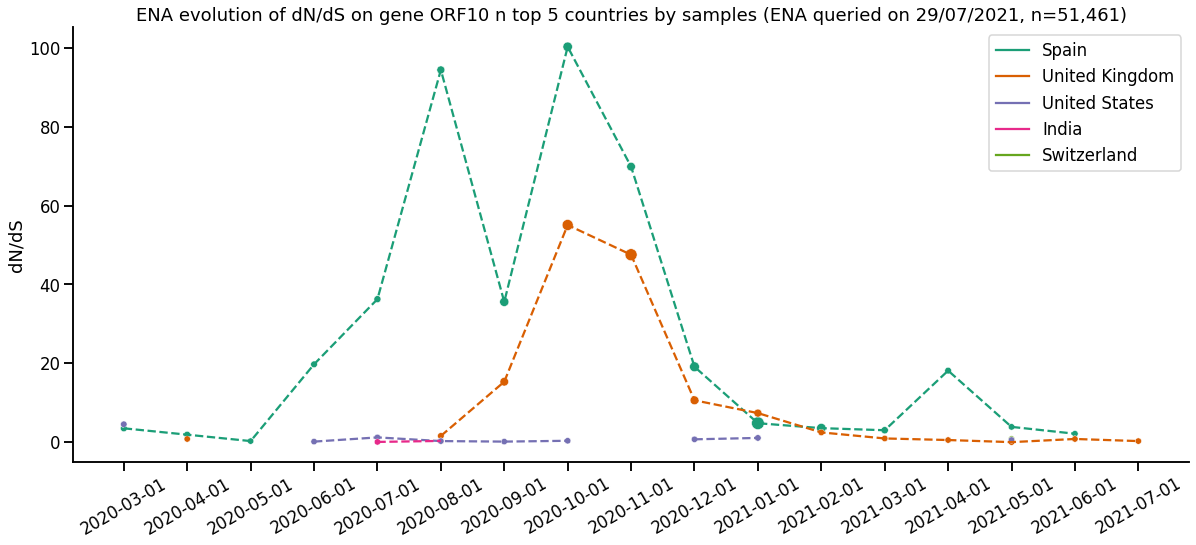

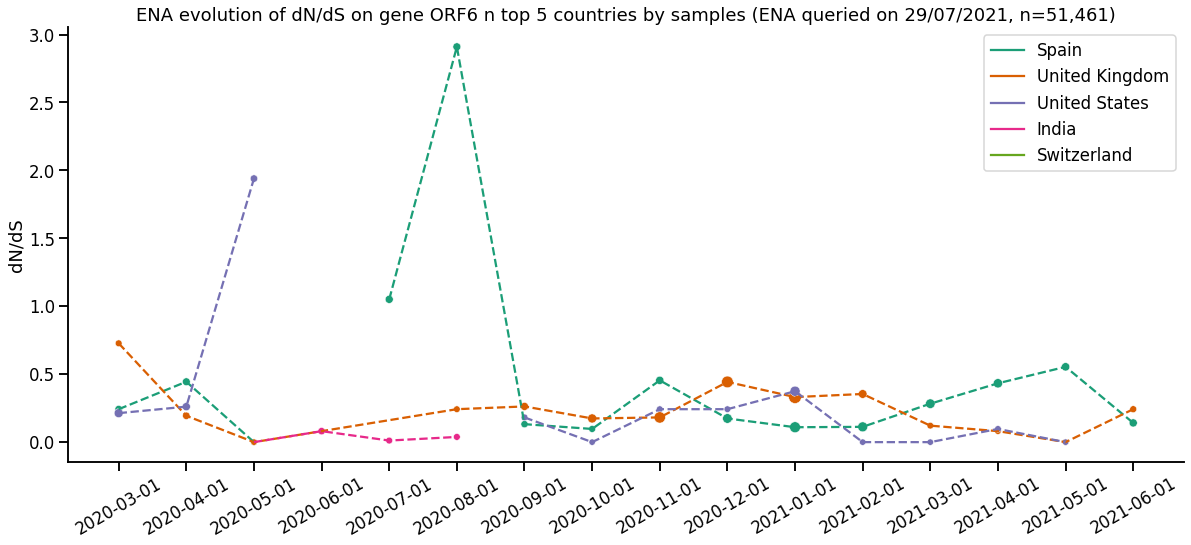

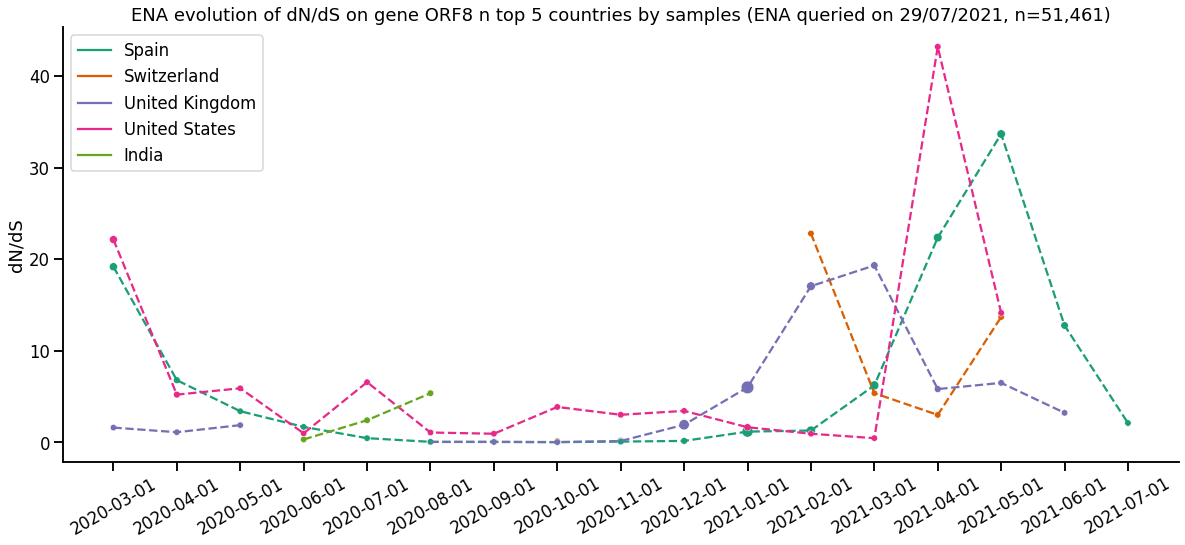

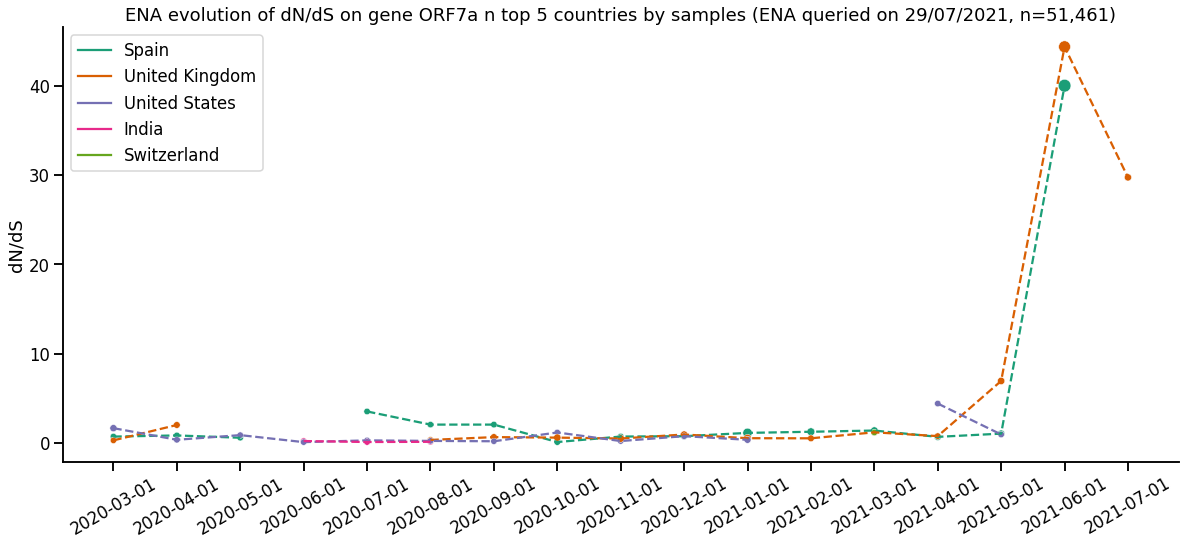

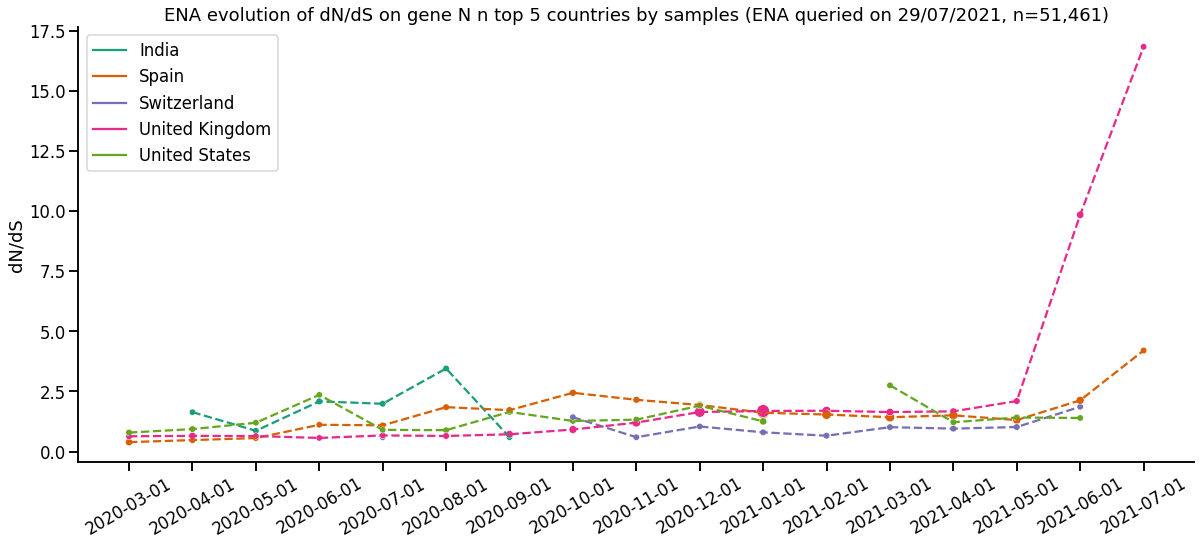

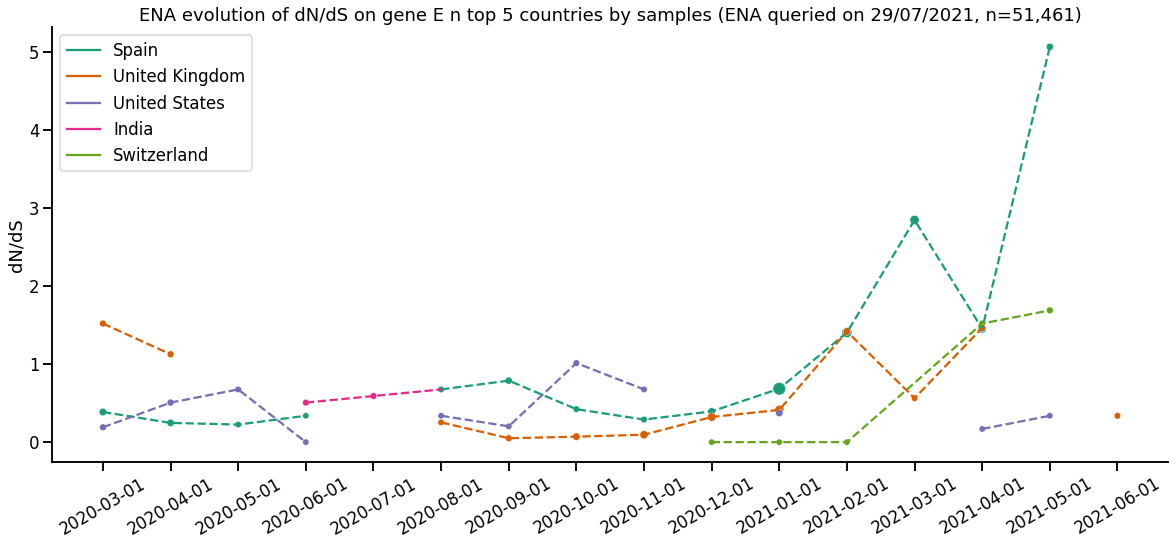

In [14]:
for g in genes:
    top_countries_ena = ["United Kingdom", "United States", "India", "Spain", "Switzerland"]
    plot_dn_ds_by_country(
        data=data[(data.source == "ENA") & (data.region_name == g) & (data.country.isin(top_countries_ena)) & (data.month >= "2020-03-01")], 
        title="ENA evolution of dN/dS on gene {gene} n top 5 countries by samples (ENA queried on {date}, n={num_samples})".format(
            gene=g, date=ena_download_date, num_samples=ena_num_samples), 
        filename="dn_ds_figures/dn_ds_{gene}_by_month_top5_countries_ena.png".format(gene=g),
        ratio=ratios[g]
    )

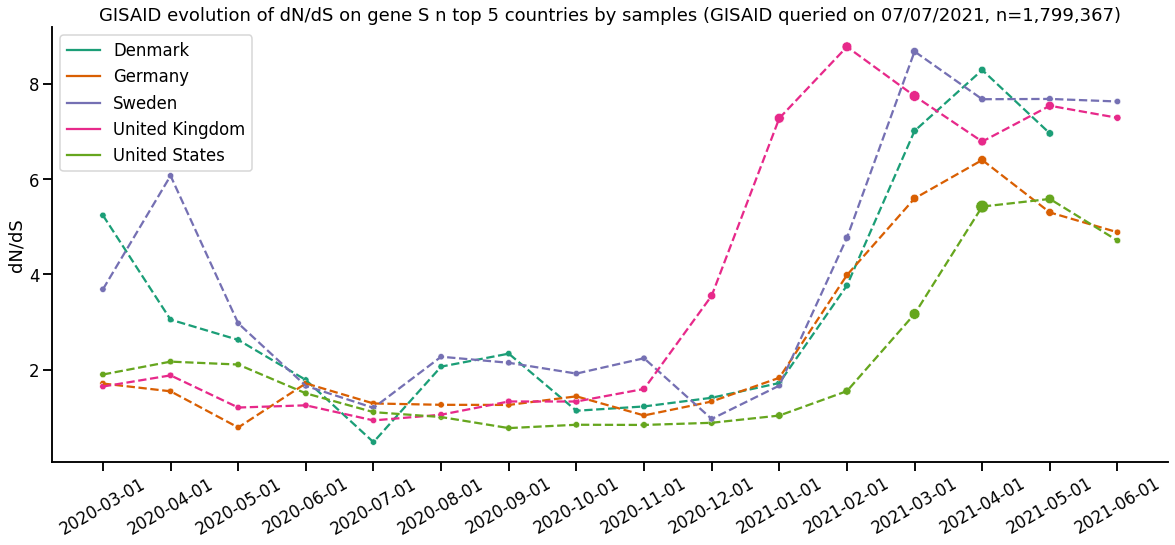

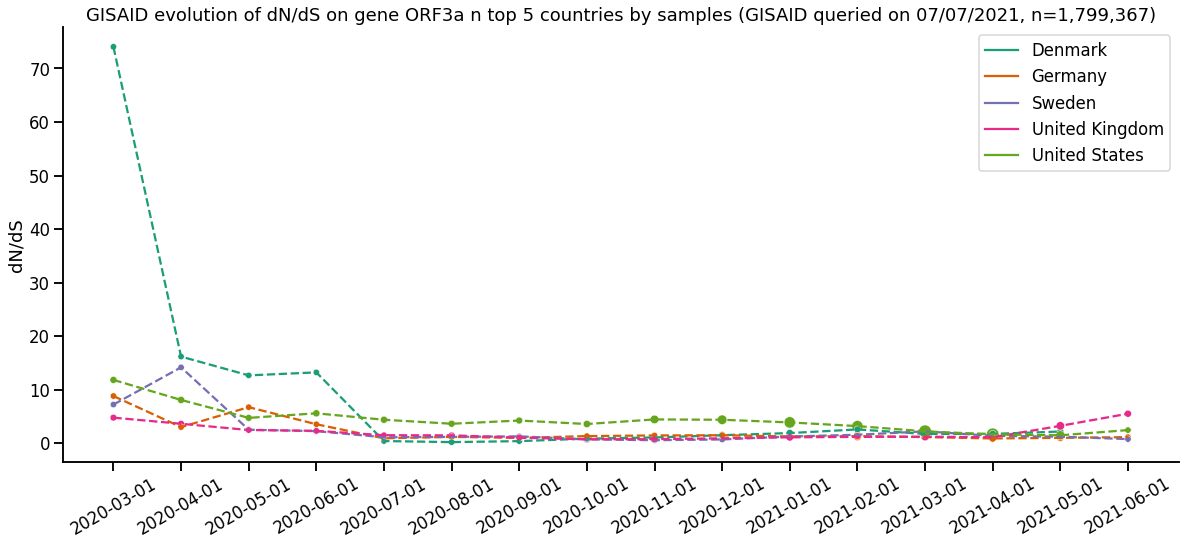

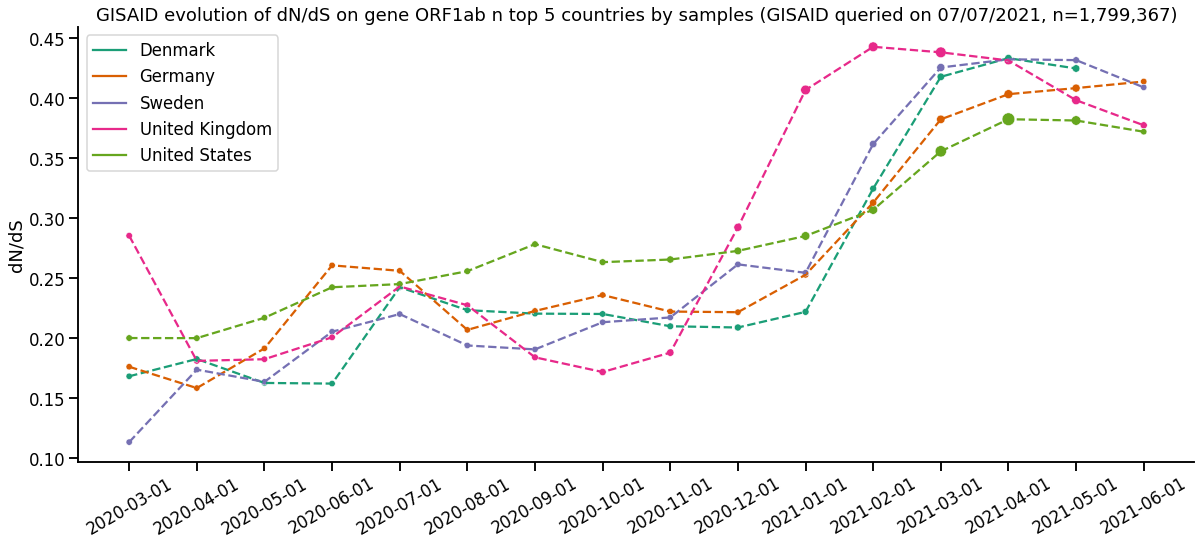

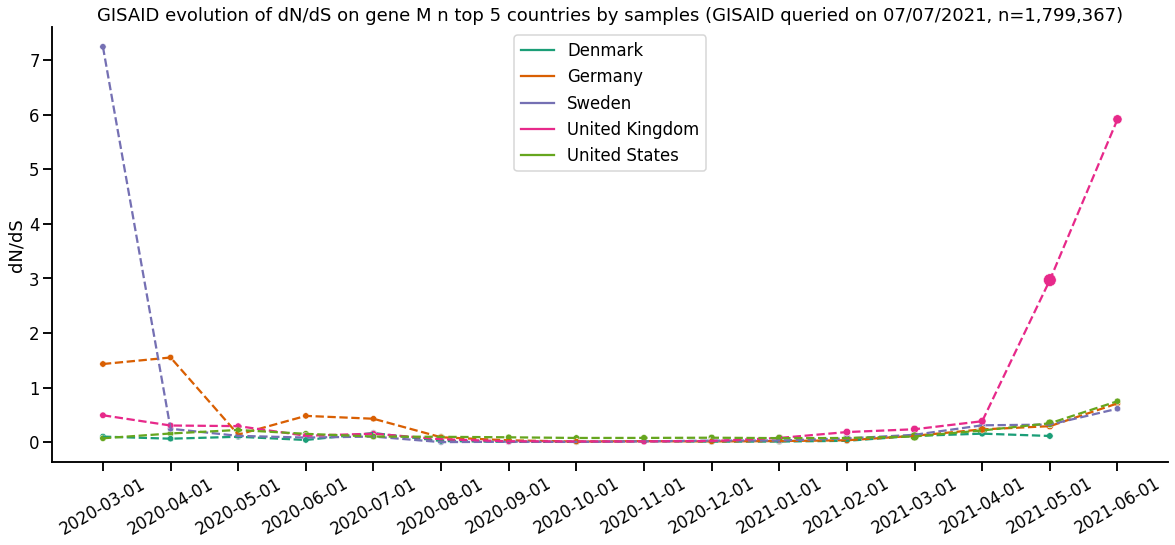

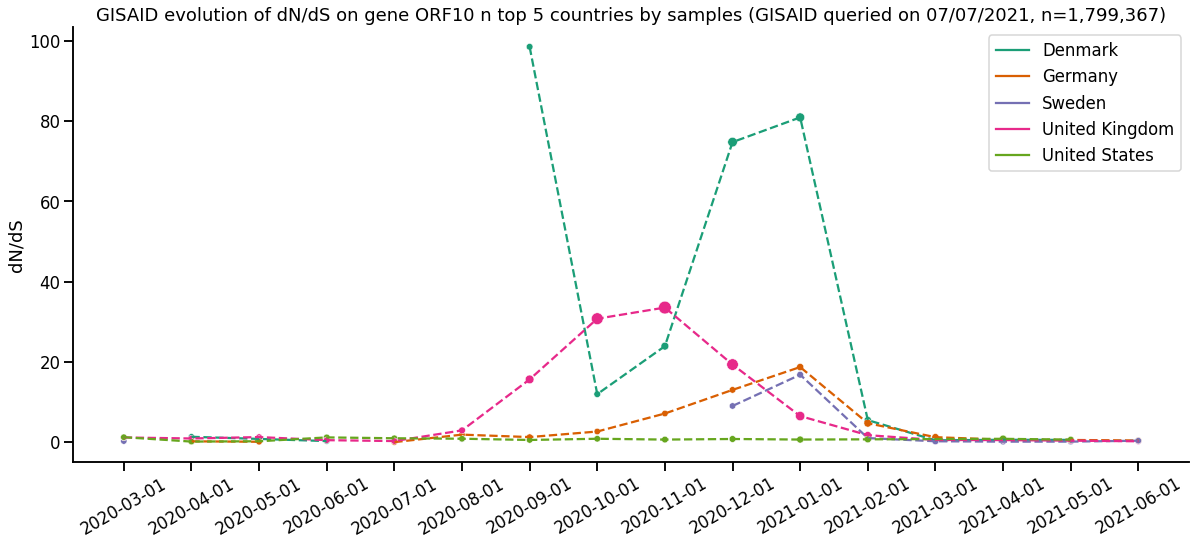

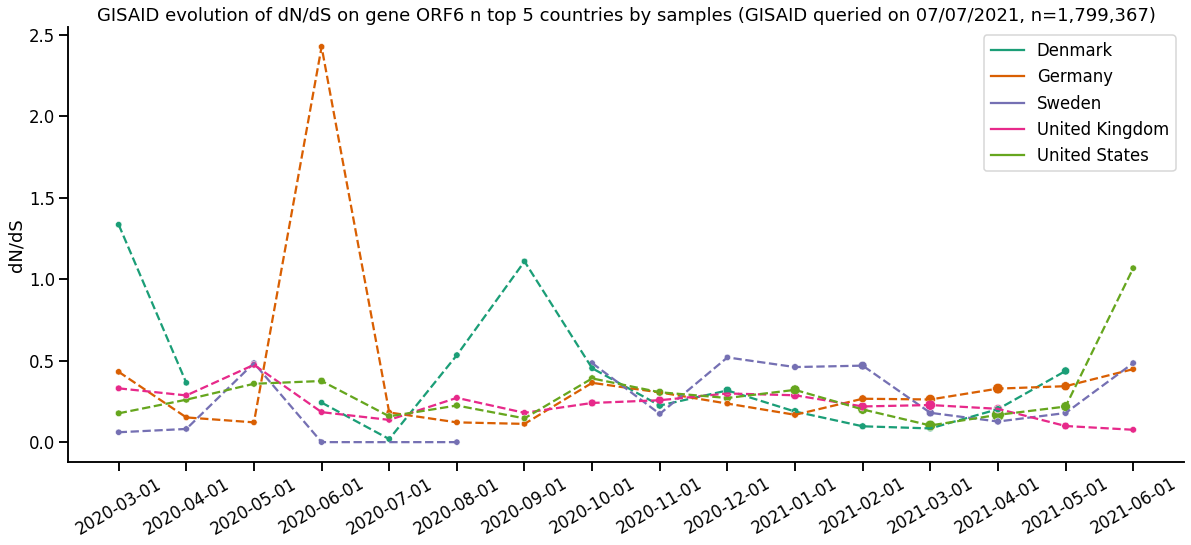

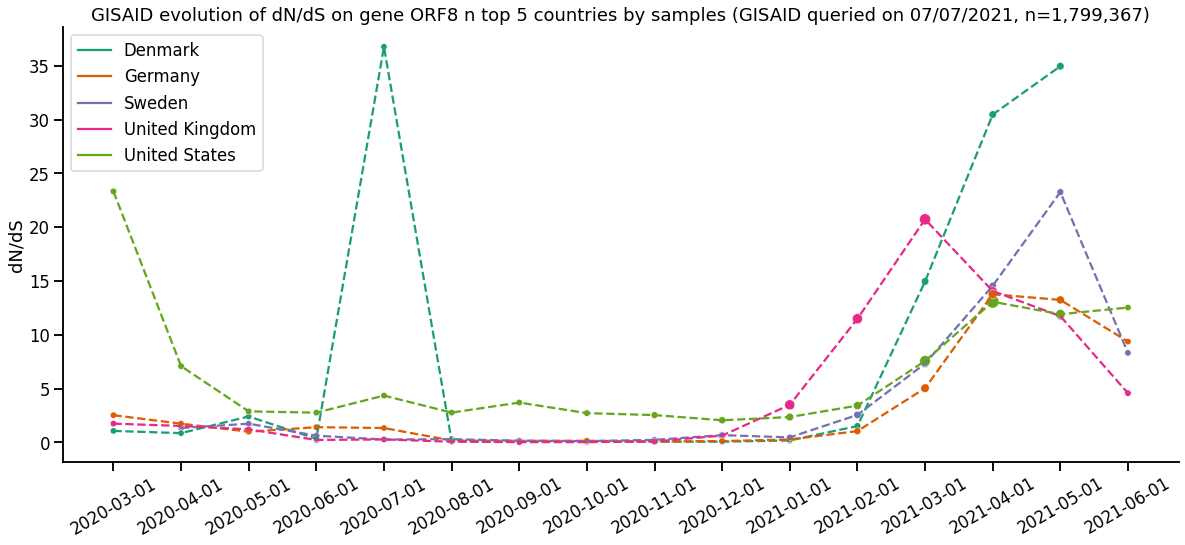

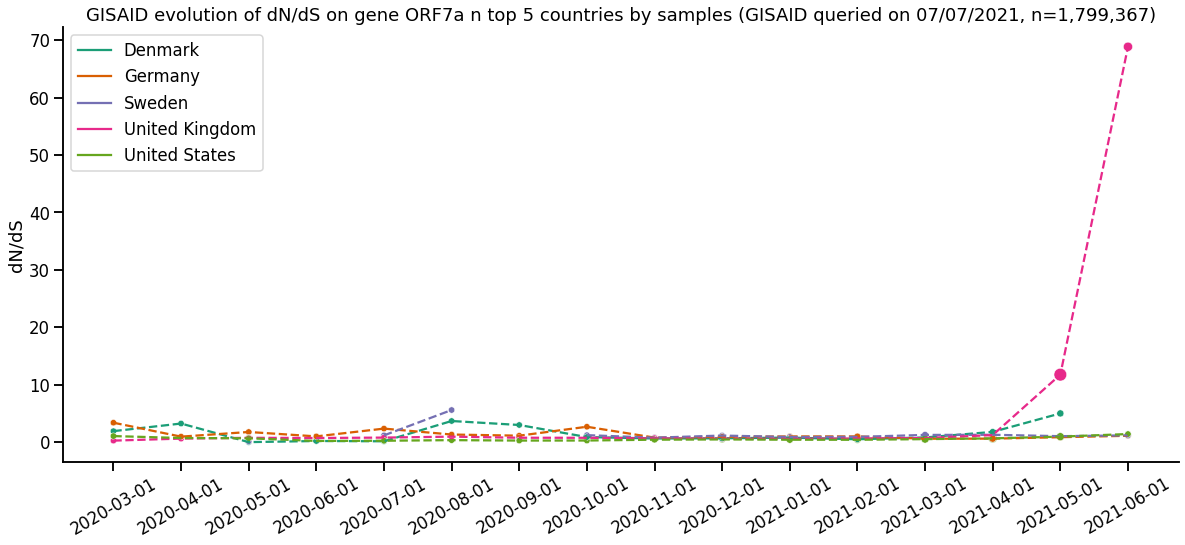

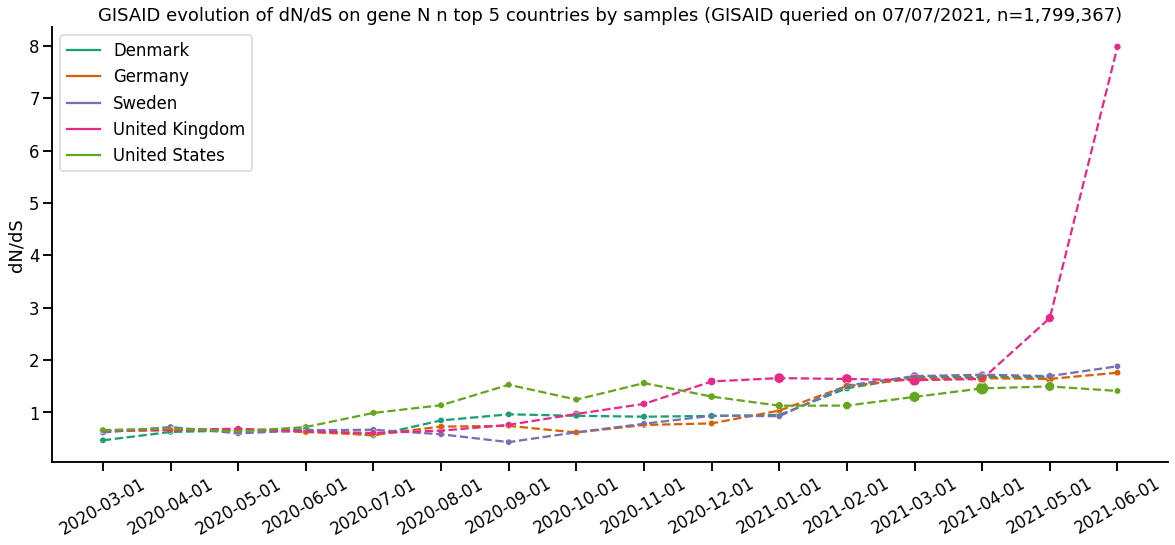

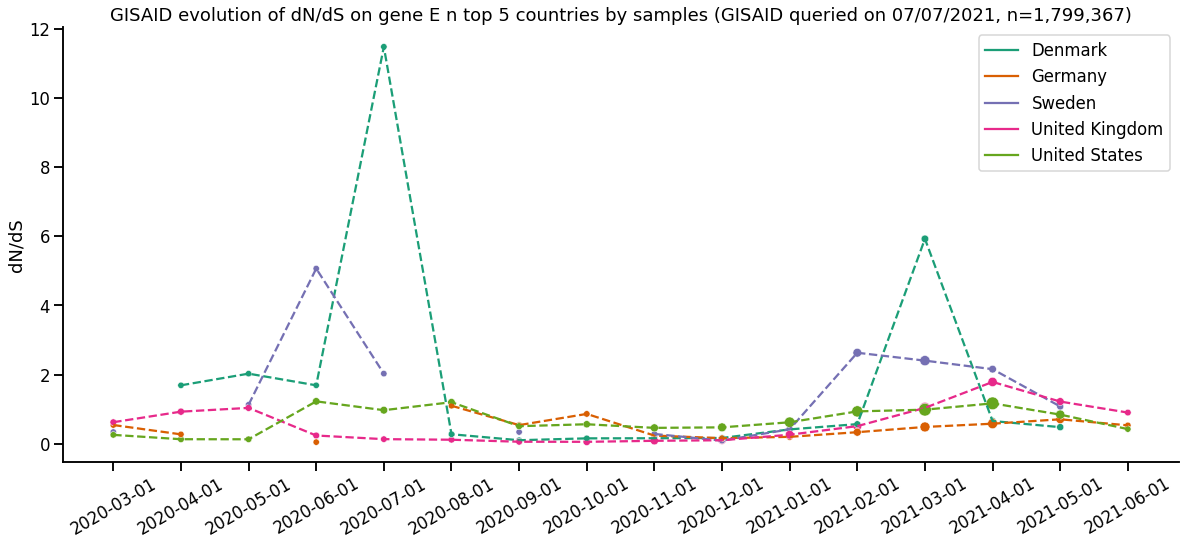

In [15]:
top_countries_gisaid = ["United Kingdom", "United States", "Germany", "Denmark", "Sweden"]
for g in genes:
    plot_dn_ds_by_country(
        data=data[(data.source == "GISAID") & (data.region_name == g) & (data.country.isin(top_countries_gisaid)) & (data.month >= "2020-03-01")], 
        title="GISAID evolution of dN/dS on gene {gene} n top 5 countries by samples (GISAID queried on {date}, n={num_samples})".format(
            gene=g, date=gisaid_download_date, num_samples=gisaid_num_samples), 
        filename="dn_ds_figures/dn_ds_{gene}_by_month_top5_countries_gisaid.png".format(gene=g),
        ratio=ratios[g]
    )

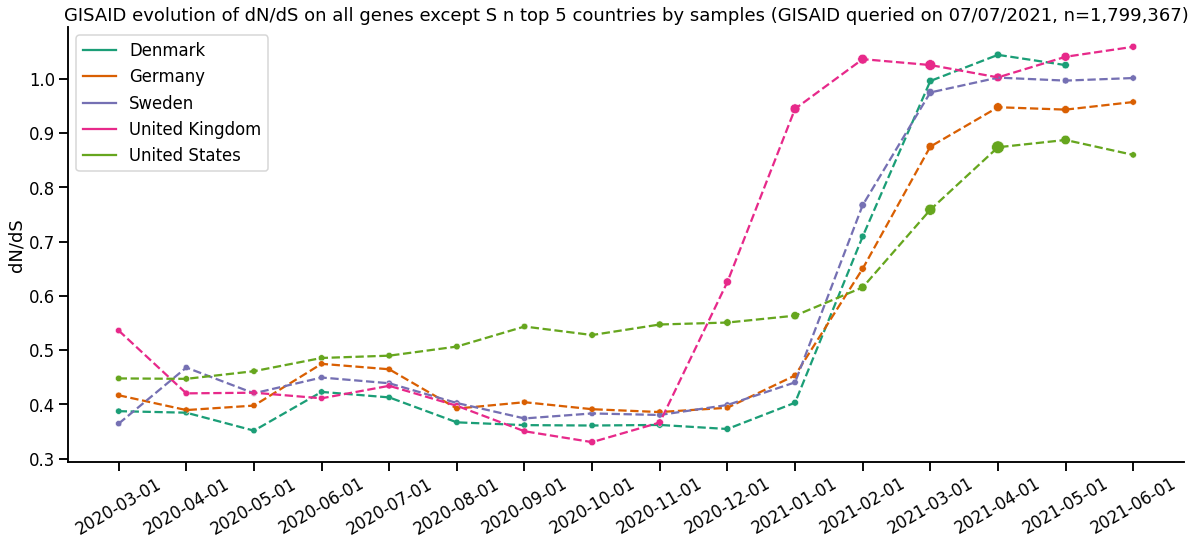

In [24]:
plot_dn_ds_by_country(
        data=data[(data.source == "GISAID") & (data.region_name != 'S') & (data.country.isin(top_countries_gisaid)) & (data.month >= "2020-03-01")], 
        title="GISAID evolution of dN/dS on all genes except S n top 5 countries by samples (GISAID queried on {date}, n={num_samples})".format(
            gene=g, date=gisaid_download_date, num_samples=gisaid_num_samples), 
        filename="dn_ds_figures/dn_ds_all_genes_except_S_by_month_top5_countries_gisaid.png".format(gene=g),
        ratio=ratios[g]
    )

## dN/dS on the coding region by country

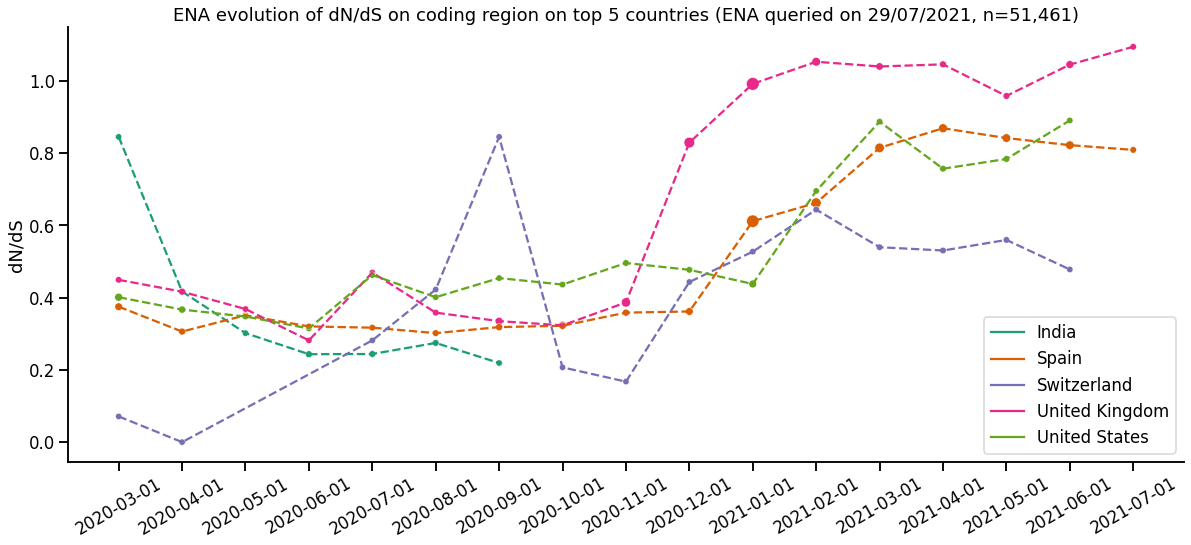

In [16]:
plot_dn_ds_by_country(
    data=data[(data.source == "ENA") & (data.country.isin(top_countries_ena)) & (data.month >= "2020-03-01")], 
    title="ENA evolution of dN/dS on coding region on top 5 countries (ENA queried on {date}, n={num_samples})".format(date=ena_download_date, num_samples=ena_num_samples), 
    filename="dn_ds_figures/dn_ds_coding_region_by_month_top5_countries_ena.png", ratio=ratio_coding_region)

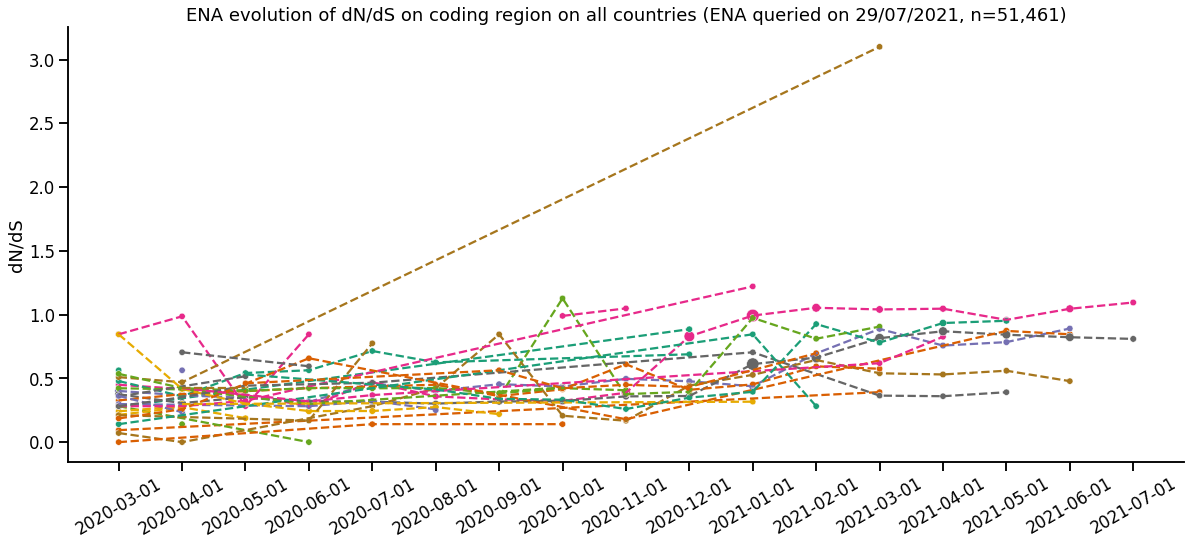

In [17]:
plot_dn_ds_by_country(
    data=data[(data.source == "ENA") & (data.month >= "2020-03-01")], 
    title="ENA evolution of dN/dS on coding region on all countries (ENA queried on {date}, n={num_samples})".format(date=ena_download_date, num_samples=ena_num_samples), 
    filename="dn_ds_figures/dn_ds_coding_region_by_month_all_countries_ena.png", legend=False, ratio=ratio_coding_region)

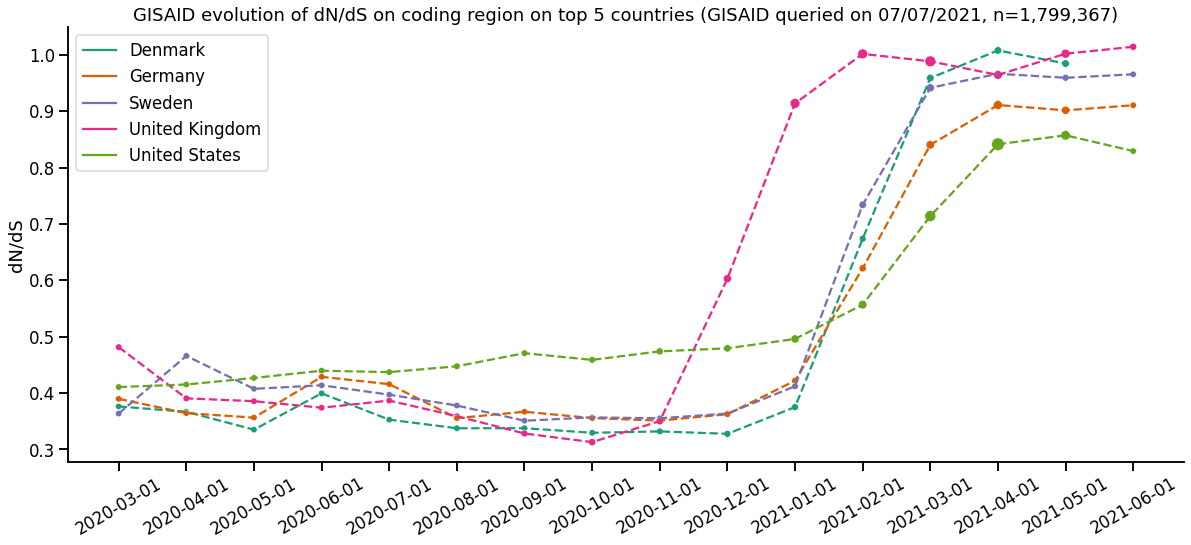

In [18]:
plot_dn_ds_by_country(
    data=data[(data.source == "GISAID") & (data.country.isin(top_countries_gisaid)) & (data.month >= "2020-03-01")], 
    title="GISAID evolution of dN/dS on coding region on top 5 countries (GISAID queried on {date}, n={num_samples})".format(date=gisaid_download_date, num_samples=gisaid_num_samples), 
    filename="dn_ds_figures/dn_ds_coding_region_by_month_top5_countries_gisaid.png", ratio=ratio_coding_region)

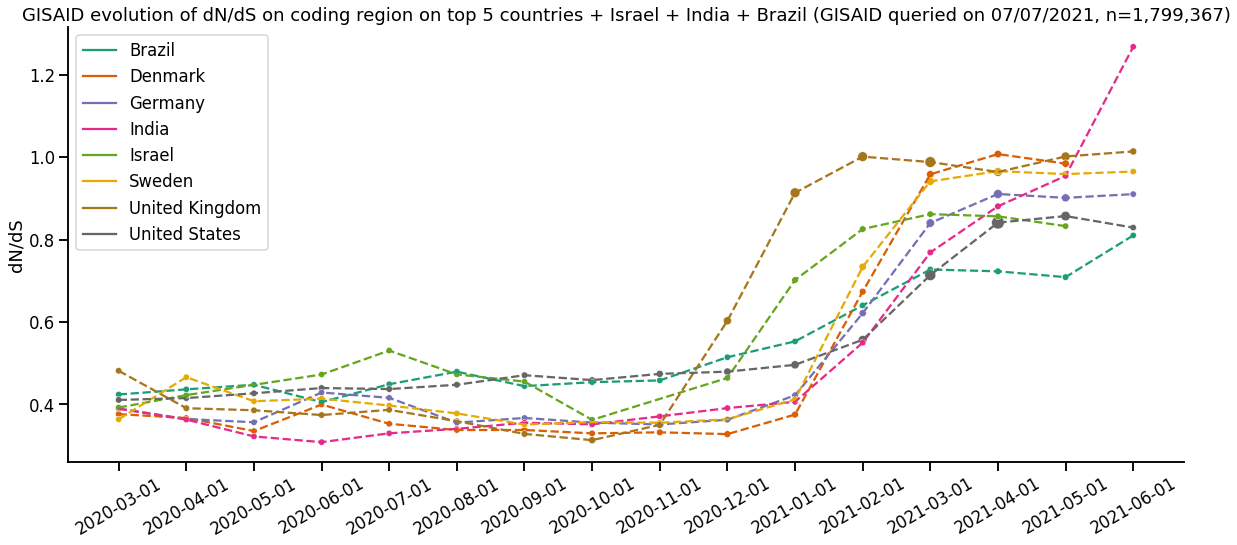

In [19]:
plot_dn_ds_by_country(
    data=data[(data.source == "GISAID") & (data.country.isin(top_countries_gisaid + ["Israel", "India", "Brazil"])) & (data.month >= "2020-03-01")], 
    title="GISAID evolution of dN/dS on coding region on top 5 countries + Israel + India + Brazil (GISAID queried on {date}, n={num_samples})".format(date=gisaid_download_date, num_samples=gisaid_num_samples), 
    filename="dn_ds_figures/dn_ds_coding_region_by_month_top5_israel_india_brazil_countries_gisaid.png", ratio=ratio_coding_region)

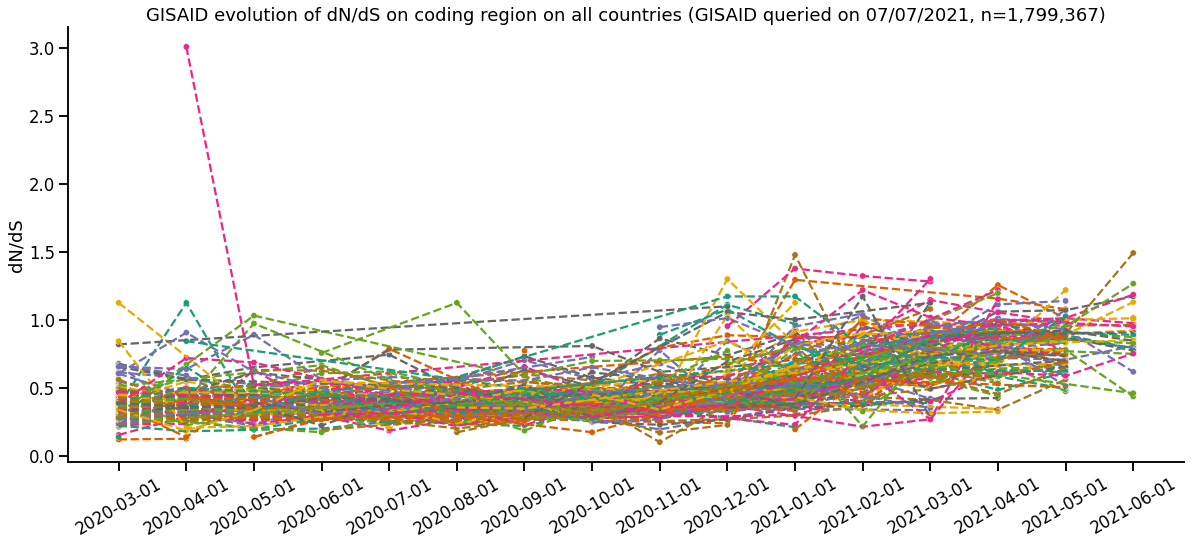

In [20]:
plot_dn_ds_by_country(
    data=data[(data.source == "GISAID") & (data.month >= "2020-03-01")], 
    title="GISAID evolution of dN/dS on coding region on all countries (GISAID queried on {date}, n={num_samples})".format(date=gisaid_download_date, num_samples=gisaid_num_samples),
    filename="dn_ds_figures/dn_ds_coding_region_by_month_all_countries_gisaid.png", ratio=ratio_coding_region, legend=False)

## dN/dS by gene

In [21]:
def plot_dn_ds_by_gene(data, title, filename, legend=True, yrange=None):
    
    data_to_plot = data.groupby(["month", "region_name"]).sum().reset_index().sort_values("month")
    data_to_plot = pd.merge(left=data_to_plot, right=ratios_df, left_on="region_name", right_on="name")
    data_to_plot["dn_ds"] = data_to_plot.ratio / (data_to_plot.s / data_to_plot.ns)
    
    plt.figure(figsize=(20, 8))
    sns.lineplot(data=data_to_plot, x="month", y="dn_ds", hue="region_name", legend=legend, linestyle="--", palette='Dark2')
    sns.scatterplot(data=data_to_plot, x="month", y="dn_ds", hue="region_name", size="ns", legend=False, palette='Dark2')
    plt.xticks(rotation=30)
    plt.title(title)
    plt.ylabel("dN/dS")
    plt.xlabel(None)
    if yrange:
        plt.ylim(yrange)
    if legend:
        plt.legend(title=None)
    sns.despine()
    plt.savefig(filename)

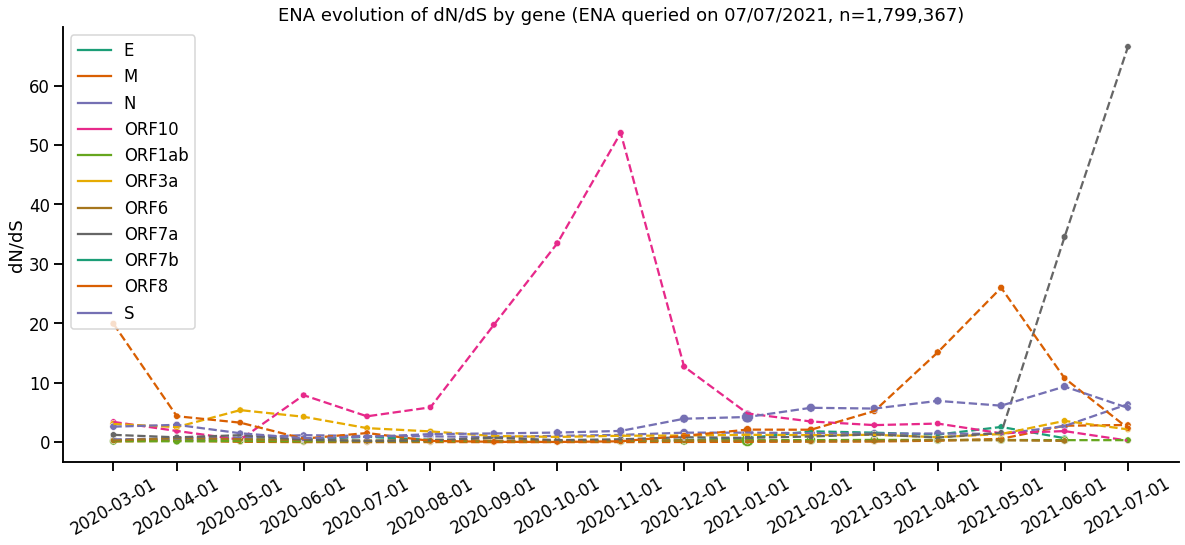

In [22]:
plot_dn_ds_by_gene(
        data=data[(data.source == "ENA") & (data.month >= "2020-03-01")], 
        title="ENA evolution of dN/dS by gene (ENA queried on {date}, n={num_samples})".format(gene=g, date=gisaid_download_date, num_samples=gisaid_num_samples),
        filename="dn_ds_figures/dn_ds_by_gene_ena.png"
    )

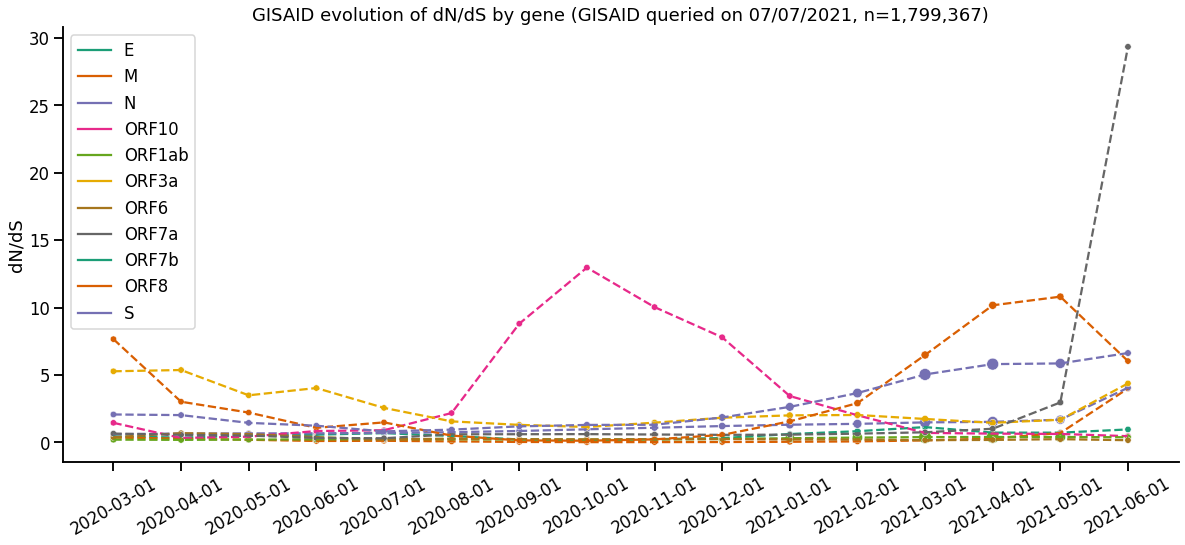

In [27]:
plot_dn_ds_by_gene(
        data=data[(data.source == "GISAID") & (data.month >= "2020-03-01")], 
        title="GISAID evolution of dN/dS by gene (GISAID queried on {date}, n={num_samples})".format(gene=g, date=gisaid_download_date, num_samples=gisaid_num_samples),
        filename="dn_ds_figures/dn_ds_by_gene_gisaid.png"
    )

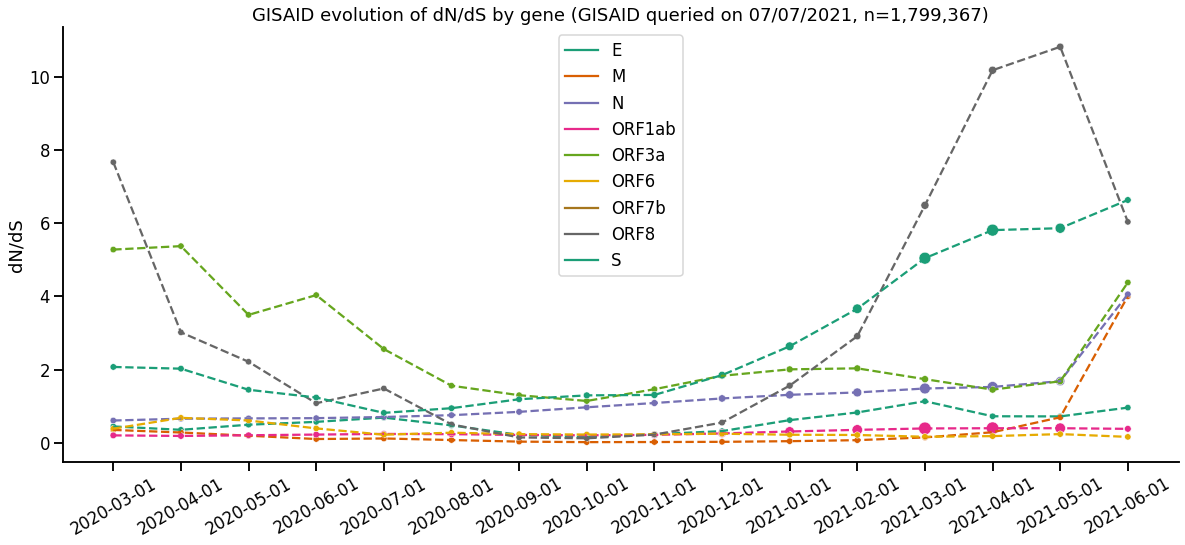

In [28]:
plot_dn_ds_by_gene(
        data=data[(data.source == "GISAID") & (data.month >= "2020-03-01") & (data.region_name != "ORF7a") & (data.region_name != "ORF10")], 
        title="GISAID evolution of dN/dS by gene (GISAID queried on {date}, n={num_samples})".format(gene=g, date=gisaid_download_date, num_samples=gisaid_num_samples),
        filename="dn_ds_figures/dn_ds_by_gene_gisaid_except_ORF7a_ORF10.png"
    )